# Phase 3 Project Submission

* Student(s) name: Phil Conrad Kirundi
* Student(s) pace: Full-Time Hybrid
* Scheduled project review date/time: 26th August - 1st September 2024
* Instructor name: Diana Mongina

# Business Understanding

## Problem Statement

The company, Richard's & Son's company is facing a problem of attrition in which many employees are resigning/quitting from the company. The executives are concerned and would like to know if the rate of attrition will increase in the future. This project will help them understand the reasons behind this catastrophe while also creating a proper working environment for its employees.

## Objectives

In this project, we are interested in finding answers to the following questions:

 1. Find out why the rate of attrition has increased.
 2. Develop a model that will accurately predict future rate of attrition.
 3. Find a probable solution to reduce attrition.

# Data Understanding & Preparation

This data talks about the attrition cases that have been rampant in the company and are grouped according to age, gender, educational background, job role etc. So we need to understand the data structure before going forward.

In [1]:
# Importing necessary modules and packages

#for data analysis and manipulation
import pandas as pd
import numpy as np

#For plotting
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Set visualization style
sns.set_style("darkgrid")

# Display plots in the notebook
%matplotlib inline

#Modelling and supervised learning
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_curve, roc_auc_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE, SMOTENC

#Model tuning
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


# Filter warnings
import warnings
warnings.filterwarnings("ignore")


In [2]:
# Load the CSV file
df = pd.read_csv("data/HR-Employee-Attrition.csv")

# Display the first few rows of the dataset
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
# Stats of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

We then count the columns with specific data types.

In [4]:
# Count columns with a specific dtype, i.e., 'int64':
int_columns = df.select_dtypes(include='int64').shape[1]

# Count columns with a specific dtype, i.e., 'object' (categorical):
object_columns = df.select_dtypes(include='object').shape[1]

# Count columns with other dtypes, you can replace 'int64' or 'object' with the desired dtype:
# Example for 'float64':
float_columns = df.select_dtypes(include='float64').shape[1]

# Print the counts:
print(f"Number of int64 columns: {int_columns}")
print(f"Number of object columns: {object_columns}")
print(f"Number of float64 columns: {float_columns}")

Number of int64 columns: 26
Number of object columns: 9
Number of float64 columns: 0


There are 26 columns with int64 data type, 9 with object data type and 0 with float data type. So that means that there are 26 columns with numeric variables and 9 columns with categorical variables.

We then check if the data type has any missing values.

In [5]:
# Check null values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [6]:
# Check duplicated values
df[df.duplicated()]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


There are no missing or duplicated values.

We can then explore both the numeric and categorical columns.

In [7]:
# Describe the numeric column
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


The above statistics indicate that:

1. Min. age is 18 and max. age is 60 years.

2. Distance from home to office is min 1 KM and max. is 29 KM



In [8]:
# Describe the categorical column
df.describe(include="object")

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


From the above, there seems to be all except one column (`Over18`) that has more than one unique value.
The 'top' shows the unique value that has appeared more frequently and 'freq' shows the number of times the 'top' value appears

We have to figure out the number of unique values in each column so that we can drop the columns that are irrelevant.

In [9]:
# Explore unique values in the categorical columns
for column in df.columns:
  if df[column].dtype == object:
    print(str(column) + ":" + str(df[column].unique()))
    print(df[column].value_counts())
    print("---------------------------------------------------------------------")

Attrition:['Yes' 'No']
Attrition
No     1233
Yes     237
Name: count, dtype: int64
---------------------------------------------------------------------
BusinessTravel:['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64
---------------------------------------------------------------------
Department:['Sales' 'Research & Development' 'Human Resources']
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64
---------------------------------------------------------------------
EducationField:['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64
---------------------------------------------

In [10]:
# Explore unique values in the numeric columns
for column in df.columns:
  if df[column].dtype == 'int64':
    print(str(column) + ":" + str(df[column].unique()))
    print(df[column].value_counts())
    print("---------------------------------------------------------------------")

Age:[41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
Age
35    78
34    77
36    69
31    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
25    26
24    26
49    24
47    24
55    22
51    19
53    19
48    19
54    18
52    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: count, dtype: int64
---------------------------------------------------------------------
DailyRate:[1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1

It turns out that `EmployeeCount`, `Over18` and `StandardHours` have only one unique values and `EmployeeNumber` has 1470 unique values. These columns are irrelevant, so we need to drop them.

### Drop Unwanted Columns

In [11]:
# List of columns to remove
columns_to_drop = ['Over18', 'EmployeeNumber', 'StandardHours', 'EmployeeCount']

# Dropping the unwanted columns
df = df.drop(columns=columns_to_drop)

In [12]:
# Checking shape of dataset after dropping unwanted columns
df.shape

(1470, 31)

# Data Visualization

Visualization helps interpret and create insights on our dataset.

We first explore the numeric columns in form of histograms.

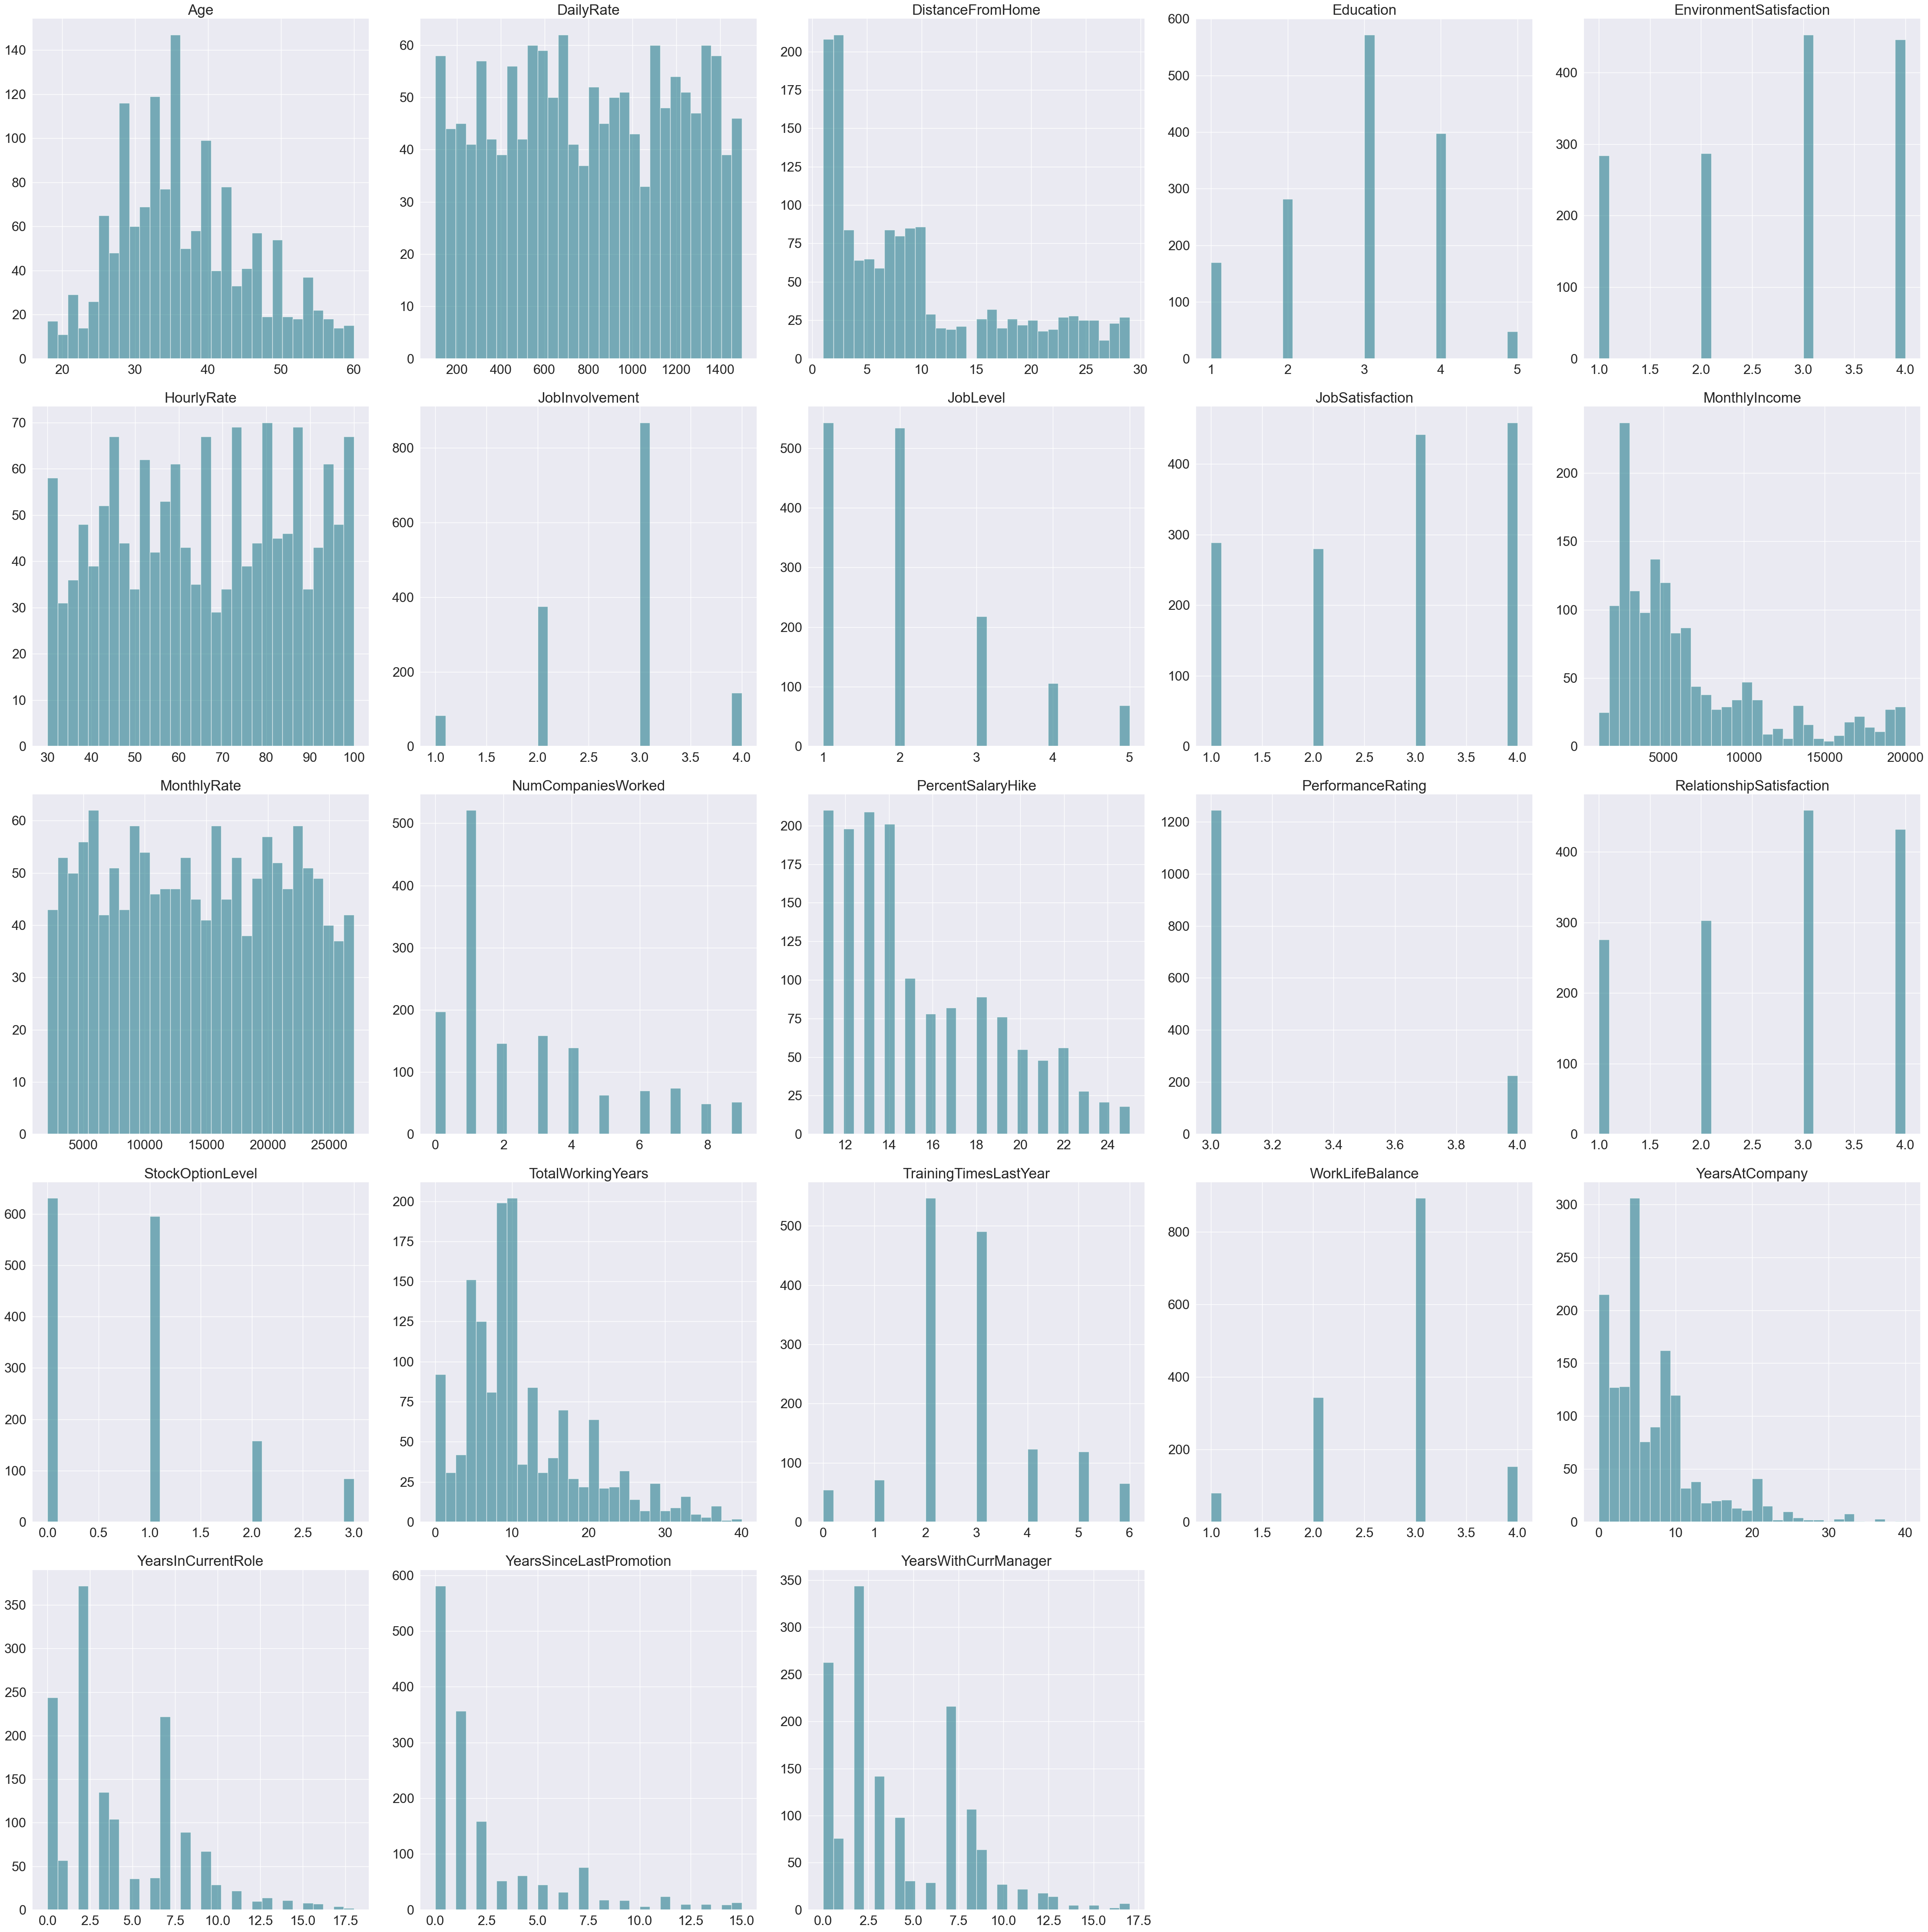

In [13]:
# Set the font size
sns.set(font_scale=2)

# Define a different color scheme (e.g., using a seaborn palette)
color_scheme = sns.color_palette("viridis")

# Plot histograms with the adjusted color scheme and slightly larger size
df.hist(bins=30, figsize=(45, 45), color=color_scheme[2], alpha=0.6)

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.25, hspace=0.25)

# Apply tight layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

`Education`,`EnvironmentSatisfaction`,`JobInvolvement`, `JobRole`, `JobSatisfaction`, `RelationshipSatisfaction` are somewhat left-slewed. This shows that most of the employees are well educated and satisfied with their job role and work environment.

`Age` distribution is a slightly right-skewed normal distribution with the bulk of the staff between 25 and 45 years old.

We then explore the categorical columns

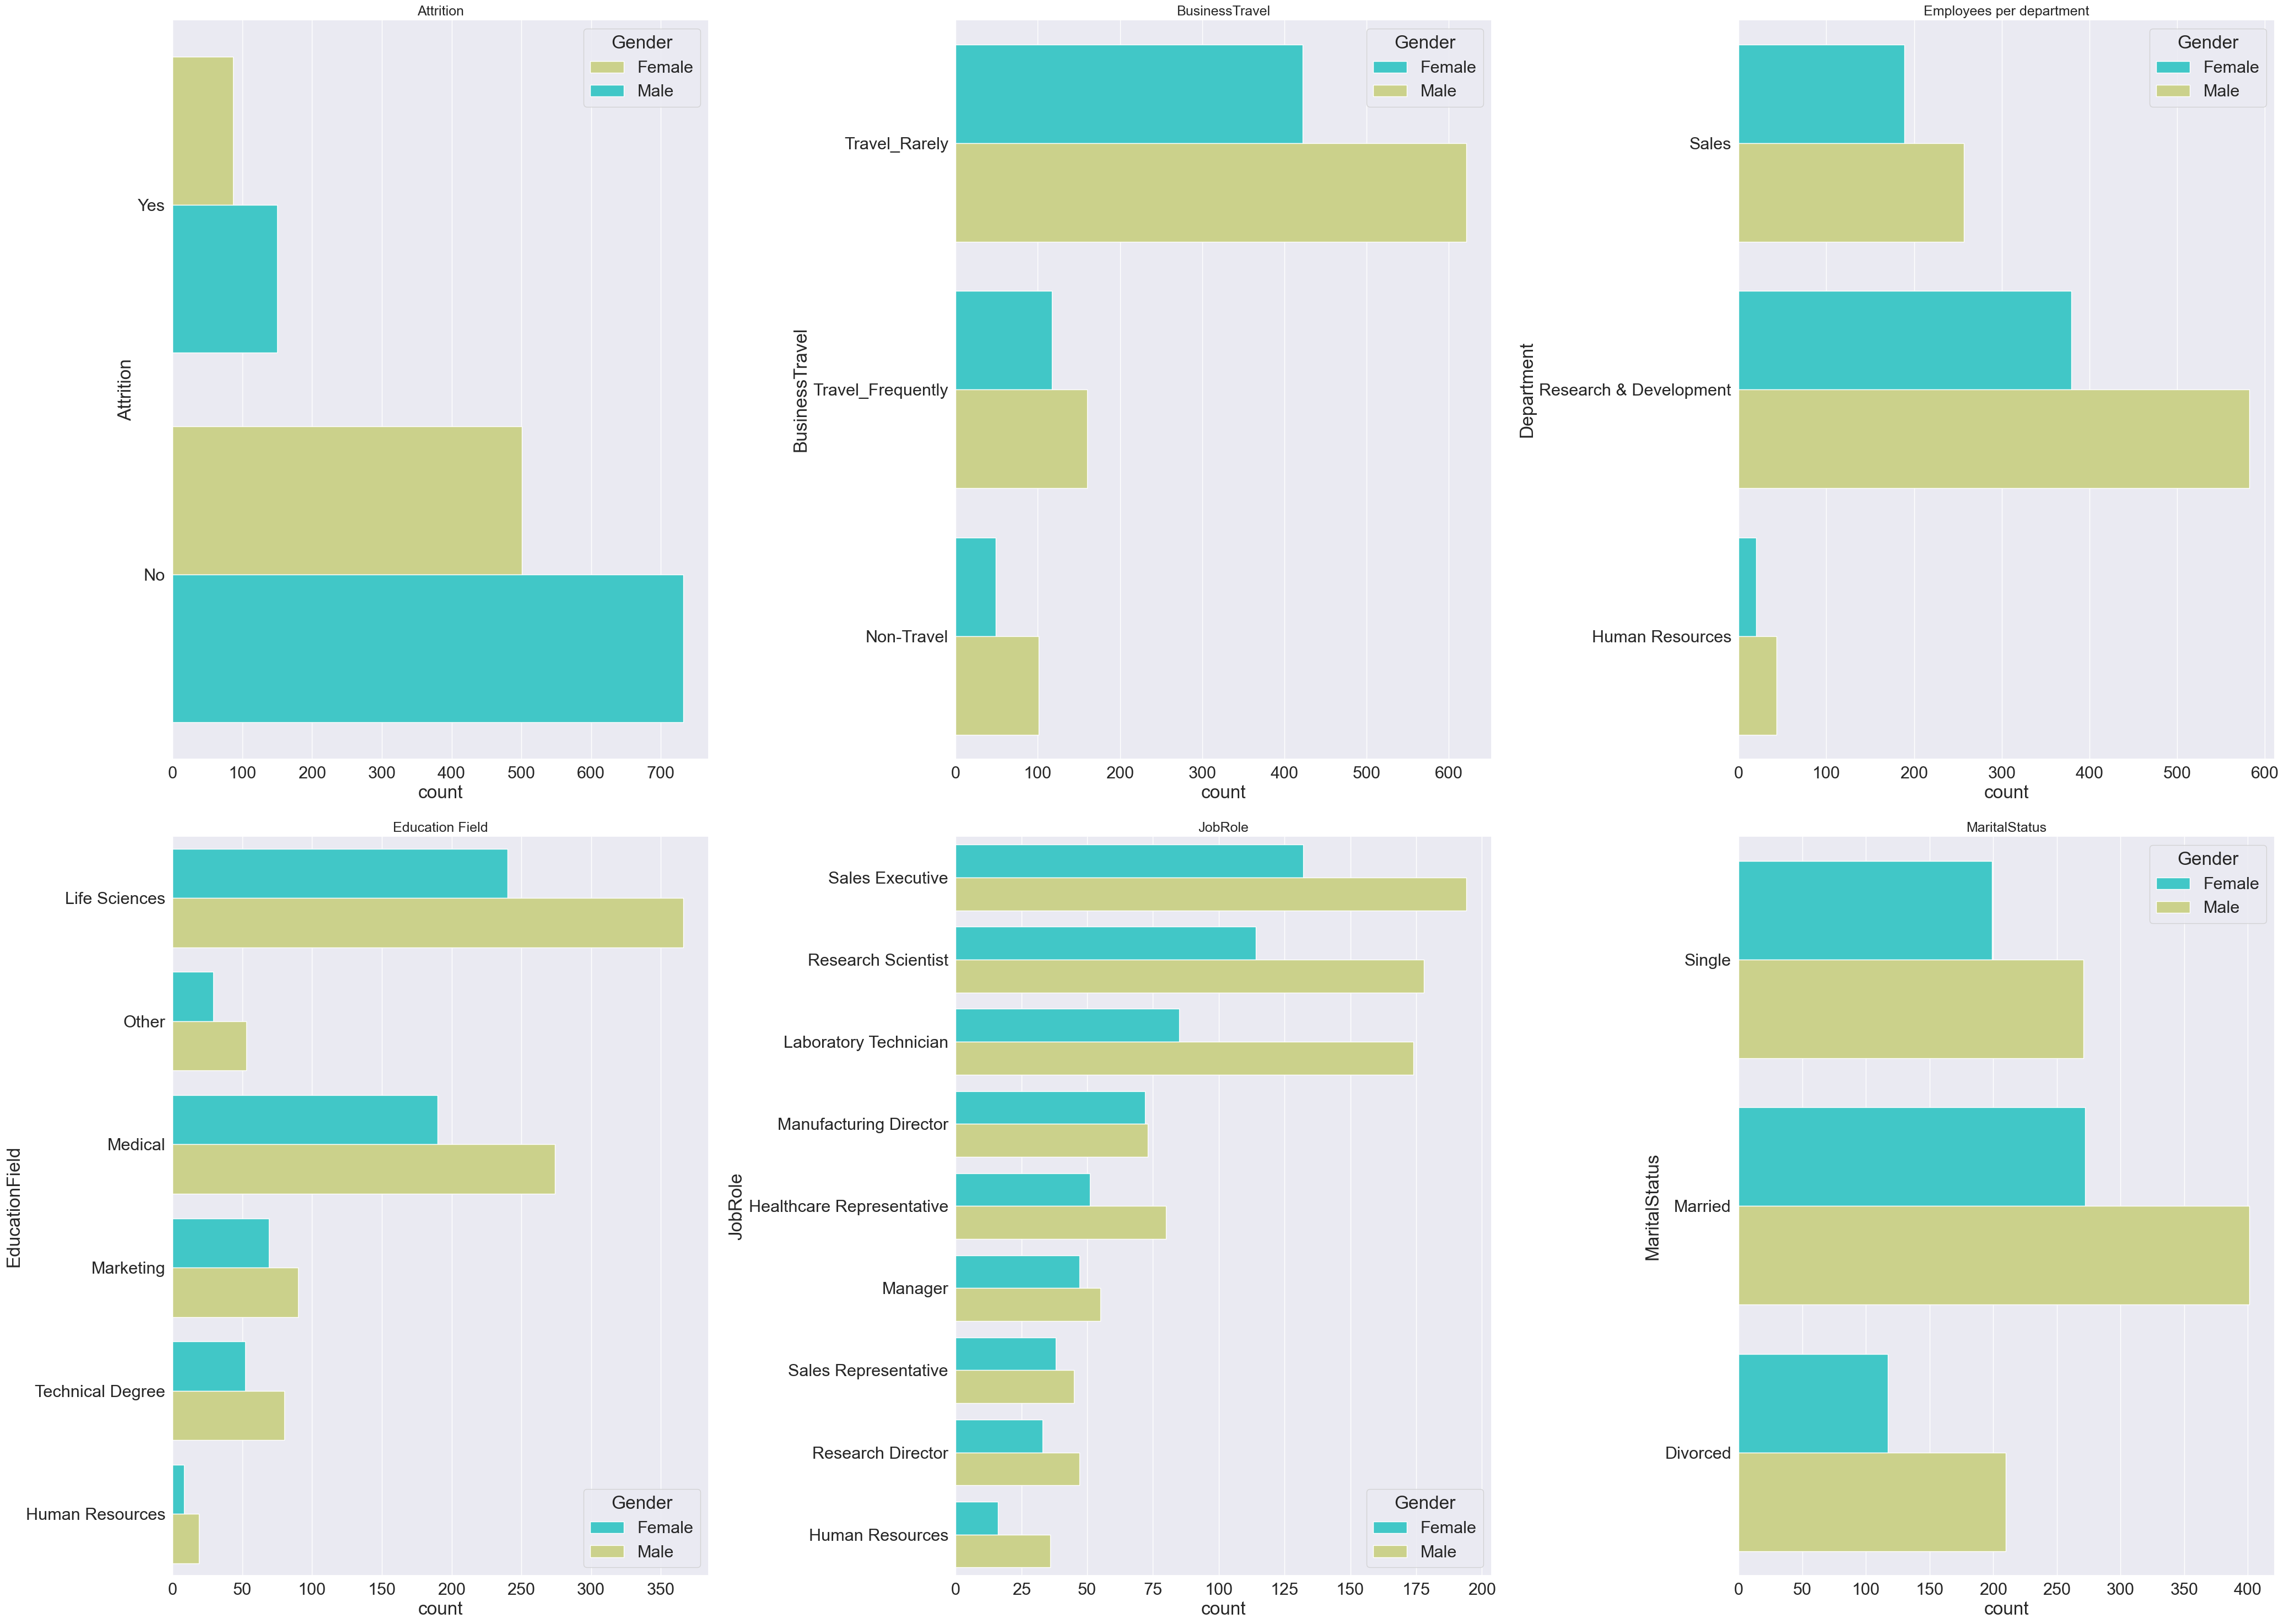

In [14]:
fig = plt.figure(figsize=(42,30))

#  subplot #1
plt.subplot(2,3,1)
plt.title('Attrition', fontsize=18)
sns.countplot(data = df, y = 'Attrition', hue= "Gender", palette='rainbow_r', orient="h")

#  subplot #2
plt.subplot(2,3,2)
plt.title('BusinessTravel', fontsize=18)
sns.countplot(data = df, y = 'BusinessTravel', hue= 'Gender', palette='rainbow', orient="h")

#  subplot #3
plt.subplot(2,3,3)
plt.title('Employees per department', fontsize=18)
sns.countplot(data = df, y = 'Department', hue = 'Gender', palette='rainbow', orient="h")

#  subplot #4
plt.subplot(2,3,4)
plt.title('Education Field', fontsize=18)
sns.countplot(data = df, y = 'EducationField', hue = 'Gender', palette='rainbow', orient="h")

#  subplot #5
plt.subplot(2,3,5)
plt.title('JobRole', fontsize=18)
sns.countplot(data = df, y = 'JobRole', hue = 'Gender', palette='rainbow', orient="h")

#  subplot #6
plt.subplot(2,3,6)
plt.title('MaritalStatus', fontsize=18)
sns.countplot(data = df, y = 'MaritalStatus', hue = 'Gender', palette='rainbow', orient="h")

# Adjust plot spacing
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.tight_layout()
plt.show()

We can see Gender-wise countplot data for all the categorical columns.
`Attrition` rate is greater in Male than Female employees.
We can also see that males are leading in every countplot.

We can also use a violin plot to easily interpret and to get insights from numerical columns. A violin plot is a data visualization tool used to understand the distribution, probability density, and variability of a dataset across different categories.

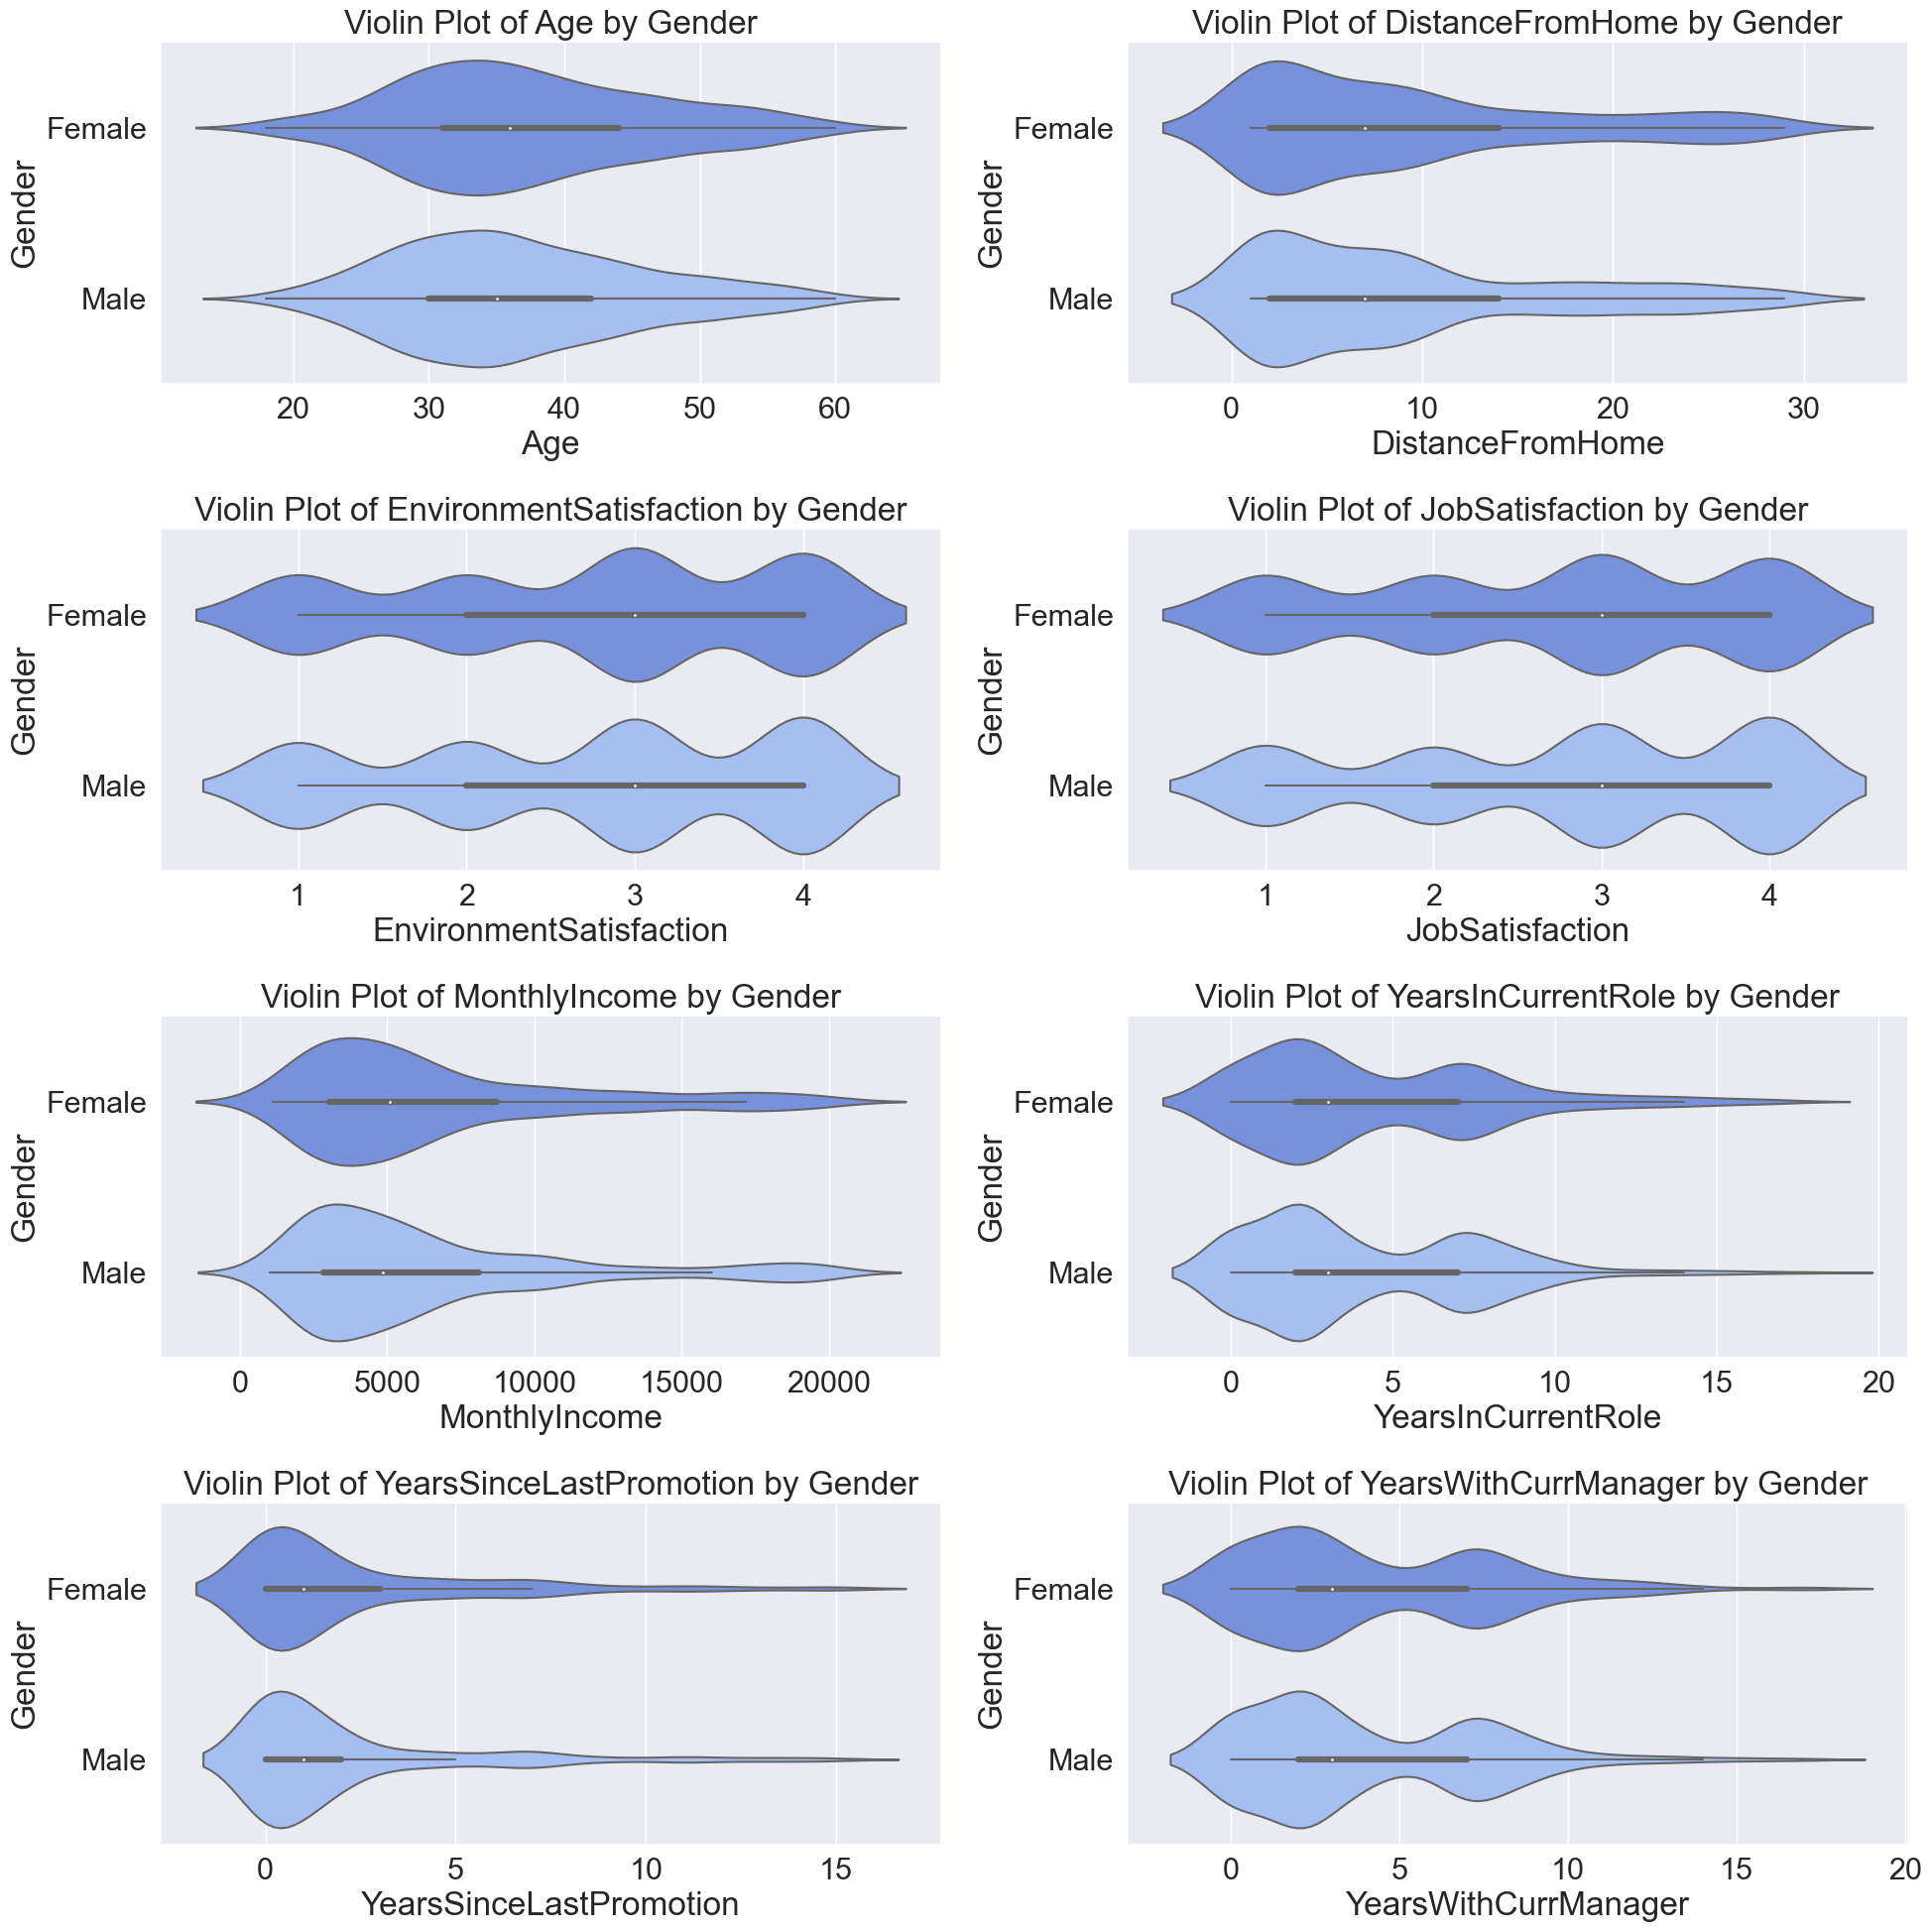

In [15]:
# Set up figure and axes
fig, axes = plt.subplots(4, 2, figsize=(20, 20))

# List of columns to plot
columns = ['Age', 'DistanceFromHome', 'EnvironmentSatisfaction', 'JobSatisfaction', 
           'MonthlyIncome', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

# Define a different color palette
palette = sns.color_palette("coolwarm")

# Plot each violin plot using a loop
for ax, column in zip(axes.flatten(), columns):
    sns.violinplot(ax=ax, data=df, x=column, y='Gender', palette=palette)
    ax.set_title(f'Violin Plot of {column} by Gender')

plt.tight_layout()
plt.show()

The insights are:
1. For all attributes for both Genders distribution is mostly even.

2. Average `Age` of employees lies between 30-40 years. Distance from home for the most of the employees lies within 2-10 KMs.

3. We can see the distribution of monthly income lies between 2500-5000.

### Correlation

We will check the correlation between the numerical columns to understand the inter-relation and dependency. It describes how strongly two variables are linearly connected or associated with each other.

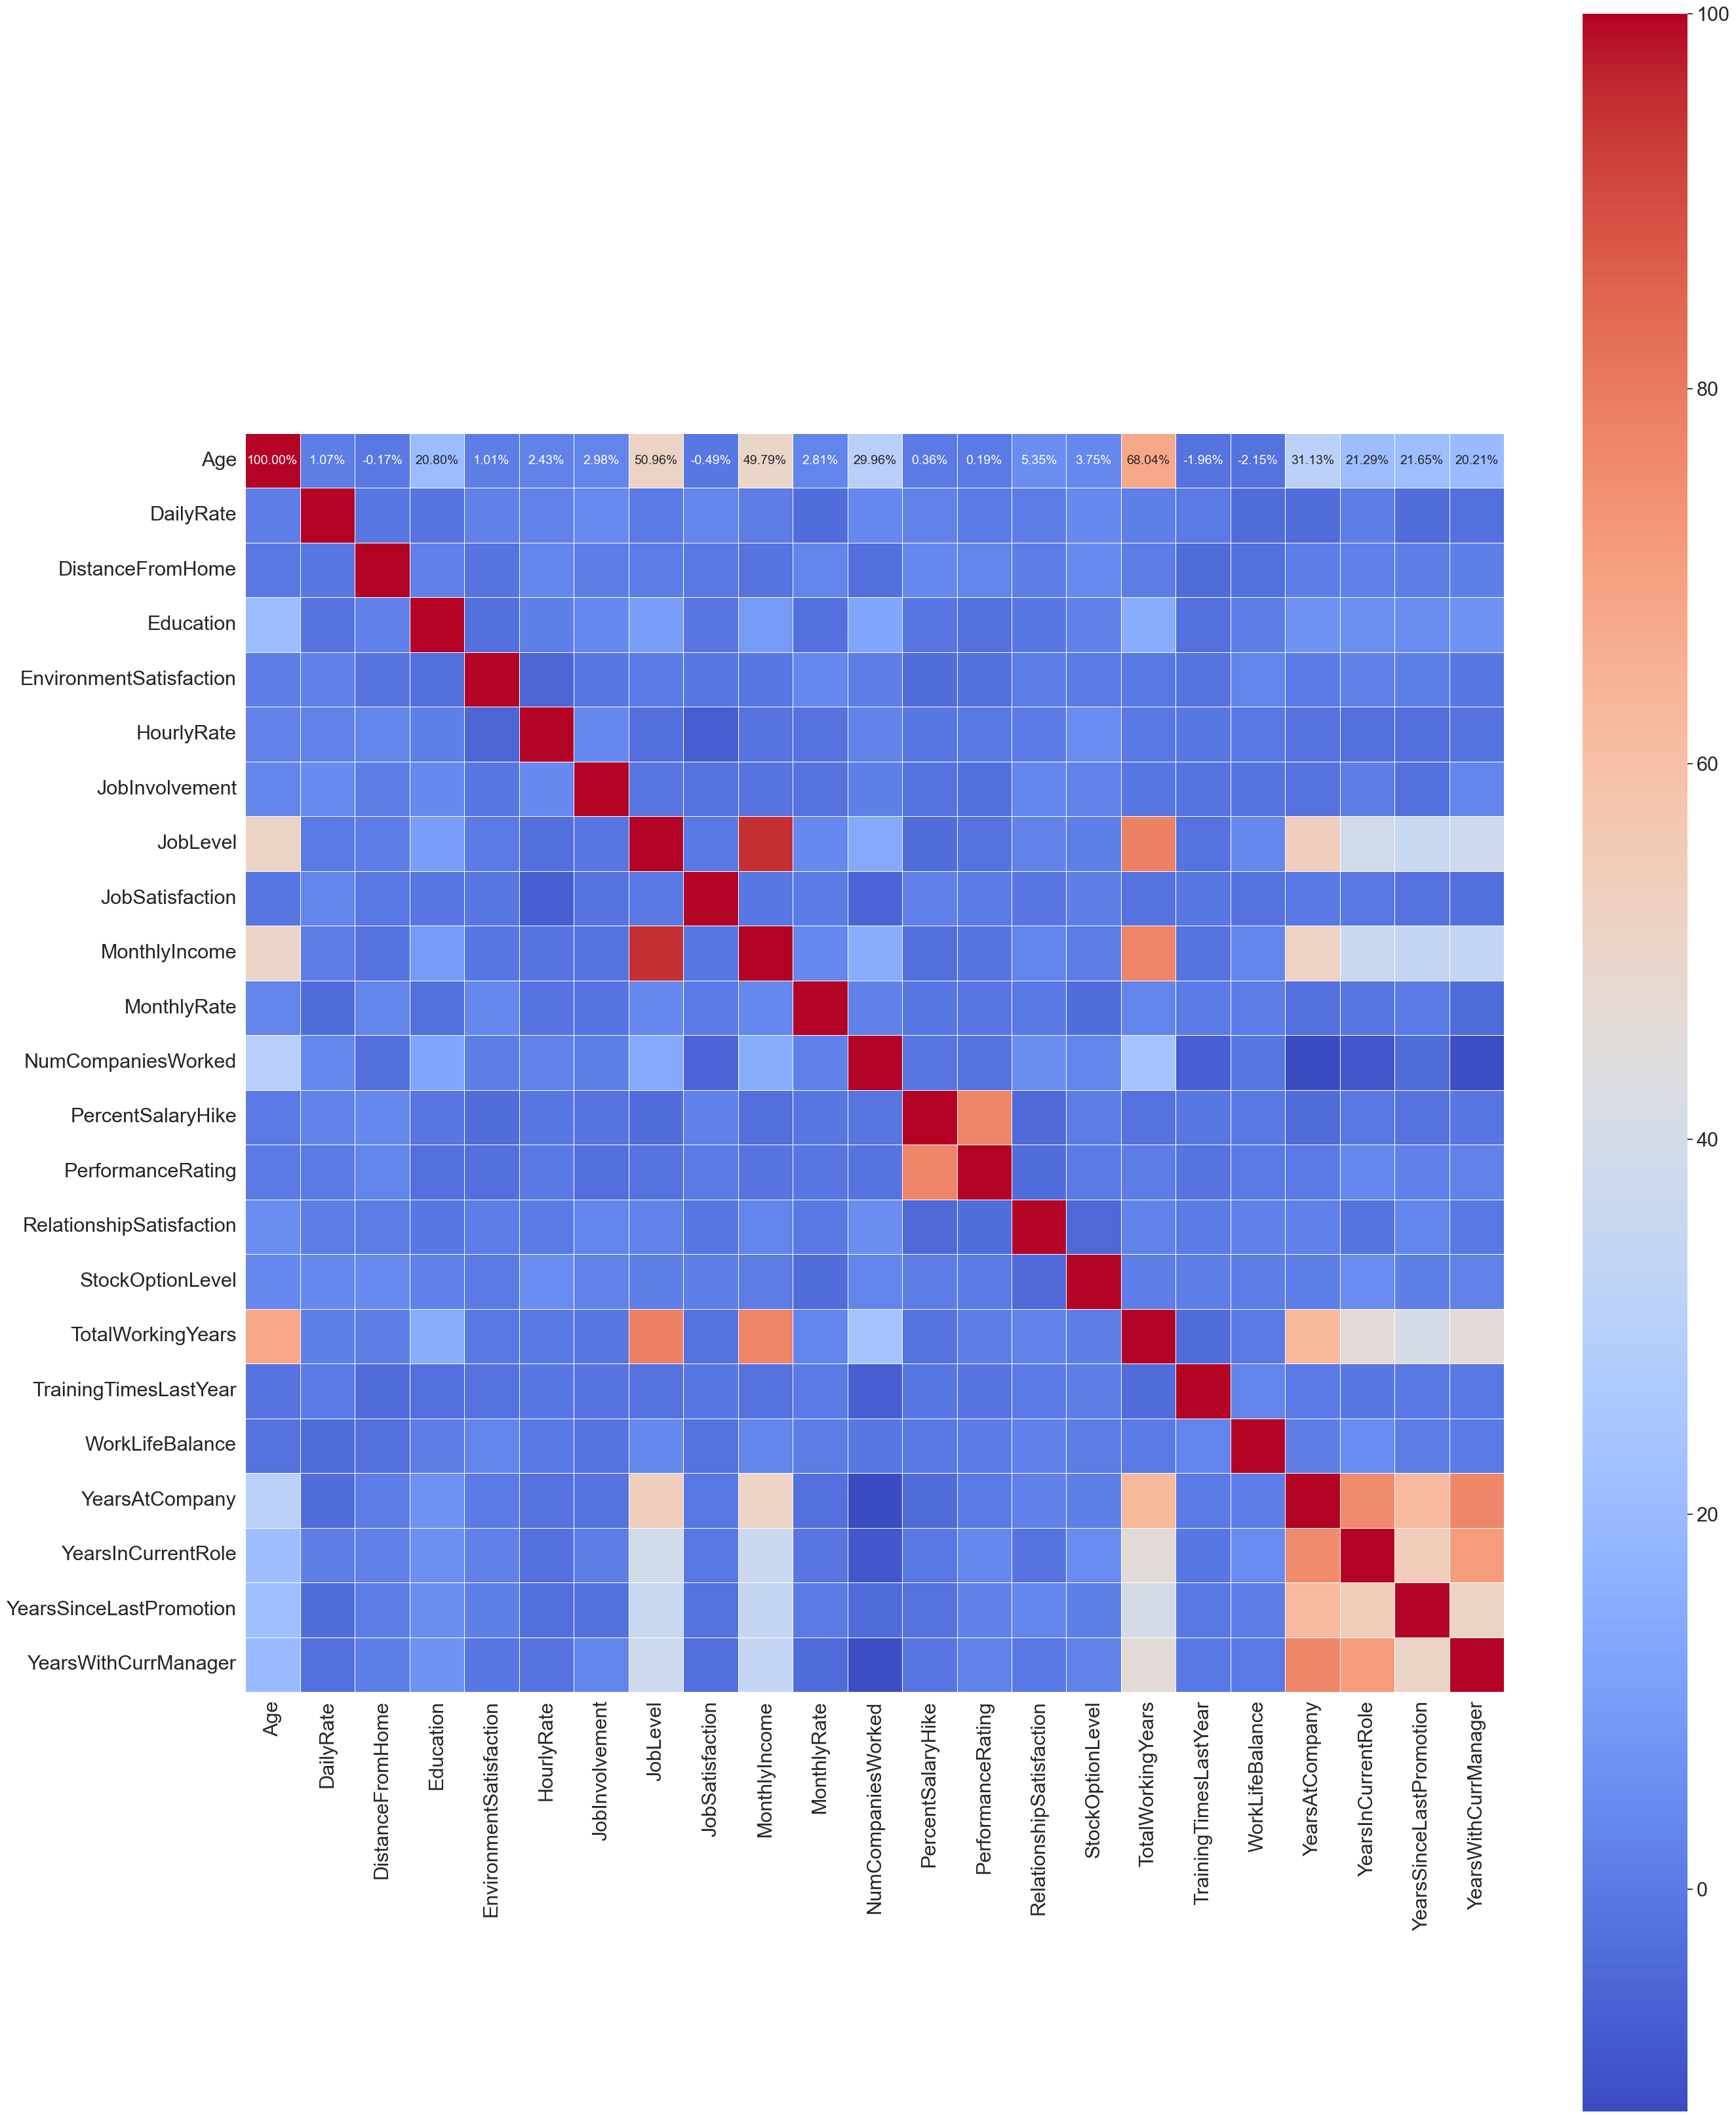

In [16]:
# Create X and y variables
X = df[['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 
        'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 
        'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 
        'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 
        'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 
        'YearsSinceLastPromotion', 'YearsWithCurrManager']]
y = df[['Attrition']].values.ravel()

# Create a correlation matrix
corr_matrix = X.corr()

# Convert correlation matrix to percentage
corr_matrix_percentage = corr_matrix * 100

# Create an annotation matrix with percentage values
import numpy as np
annot_matrix = np.vectorize(lambda x: f"{x:.2f}%")(corr_matrix_percentage)

# Create a heatmap with adjustments for clear display
plt.figure(figsize=(40, 40))
sns.heatmap(corr_matrix_percentage, annot=annot_matrix, cmap='coolwarm', linewidths=0.5, cbar=True, 
            square=True, annot_kws={"size": 14}, fmt="")

# Adjust subplot parameters for better spacing
plt.subplots_adjust(left=0.2, right=0.8, top=0.9, bottom=0.1)

# Show the plot
plt.show()

Insights include:
1. `Age` has a 68% correlation with total working years.

2. `JobLevel` has a 78% correlation with total working years. We can say that as we spend more time at a job, we are more likely to be promoted to higher job levels.

3. `MonthlyIncome` has a 77% correlation with total working years. It indicates as we work longer, we are likely to receive higher salaries.

4. `MonthlyIncome` has a 95% correlation with job level, indicating that higher job levels correspond to higher pay scales/salaries.

# Data Analysis

We will use these study questions to interpret the dataset to get more insights.

#### 1. How is attrition dependant on Age?

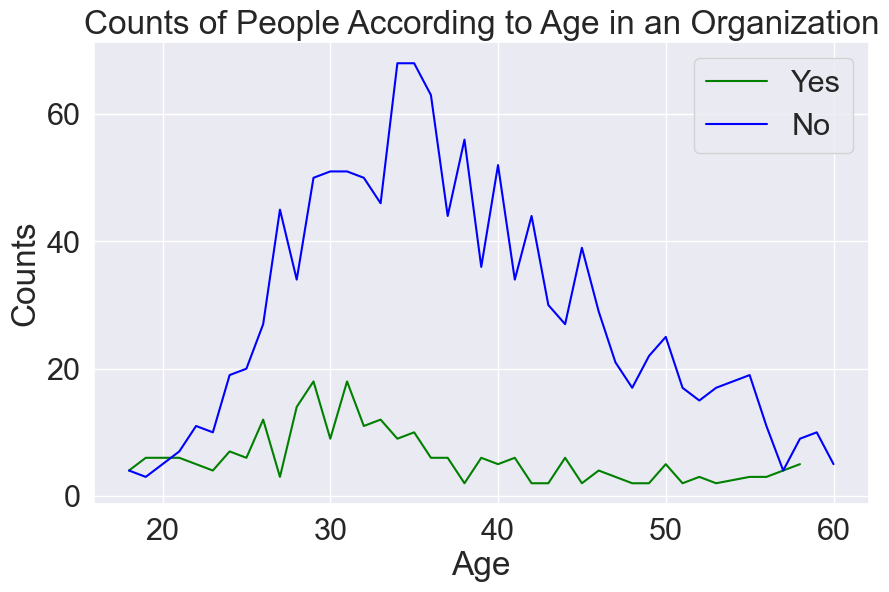

In [17]:
# Group by Age and Attrition, and count the number of employees
age_att = df.groupby(['Age', 'Attrition']).size().reset_index(name='Counts')

# Separate the data for 'Yes' and 'No' Attrition
age_att_yes = age_att[age_att['Attrition'] == 'Yes']
age_att_no = age_att[age_att['Attrition'] == 'No']

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(age_att_yes['Age'], age_att_yes['Counts'], label='Yes', color='green')
plt.plot(age_att_no['Age'], age_att_no['Counts'], label='No', color='blue')
plt.title('Counts of People According to Age in an Organization')
plt.xlabel('Age')
plt.ylabel('Counts')
plt.legend()
plt.show()

The attrition rate is the highest at the age group of between of 28-32. The attrition rate falls with increasing age. However, at a younger age (18-20), there is a higher chance of an employee leaving the organisation.

#### 2. Is the Monthly Income the main factor towards employee attrition?


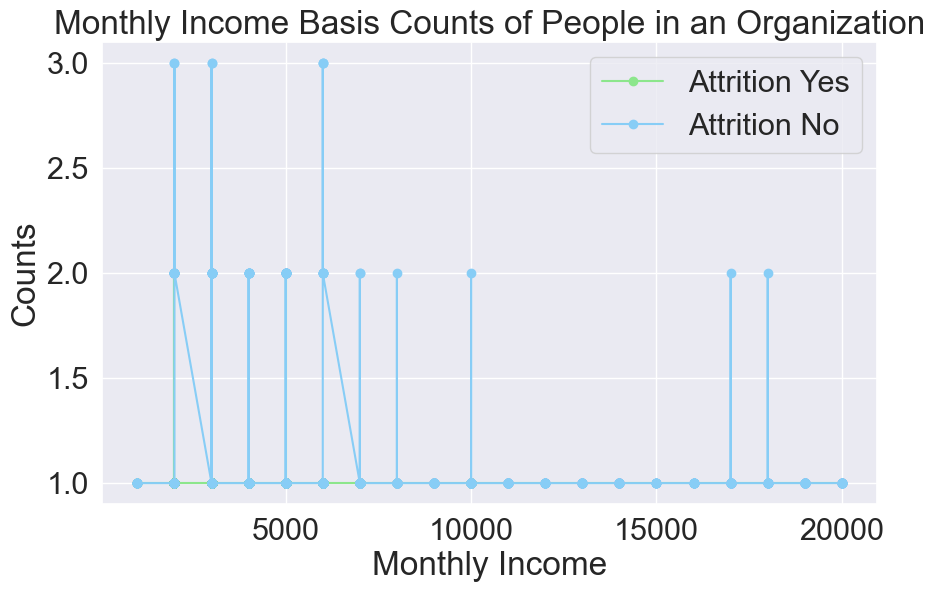

In [18]:
# Group by MonthlyIncome and Attrition and count occurrences
rate_att = df.groupby(['MonthlyIncome', 'Attrition']).size().reset_index(name='Counts')

# Round MonthlyIncome to nearest thousand
rate_att['MonthlyIncome'] = rate_att['MonthlyIncome'].round(-3)

# Separate data by Attrition status
yes_data = rate_att[rate_att['Attrition'] == 'Yes']
no_data = rate_att[rate_att['Attrition'] == 'No']

# Create the plot
plt.figure(figsize=(10, 6))

plt.plot(yes_data['MonthlyIncome'], yes_data['Counts'], marker='o', color='#8CE68C', label='Attrition Yes')
plt.plot(no_data['MonthlyIncome'], no_data['Counts'], marker='o', color='#87CDF6', label='Attrition No')

# Add titles and labels
plt.title('Monthly Income Basis Counts of People in an Organization')
plt.xlabel('Monthly Income')
plt.ylabel('Counts')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

The attrition rate tends to be higher at a lower monthly income. When the monthly income appears to be decent, the chances of an employee leaving is low.

#### 3. Does the Work department impact attrition?

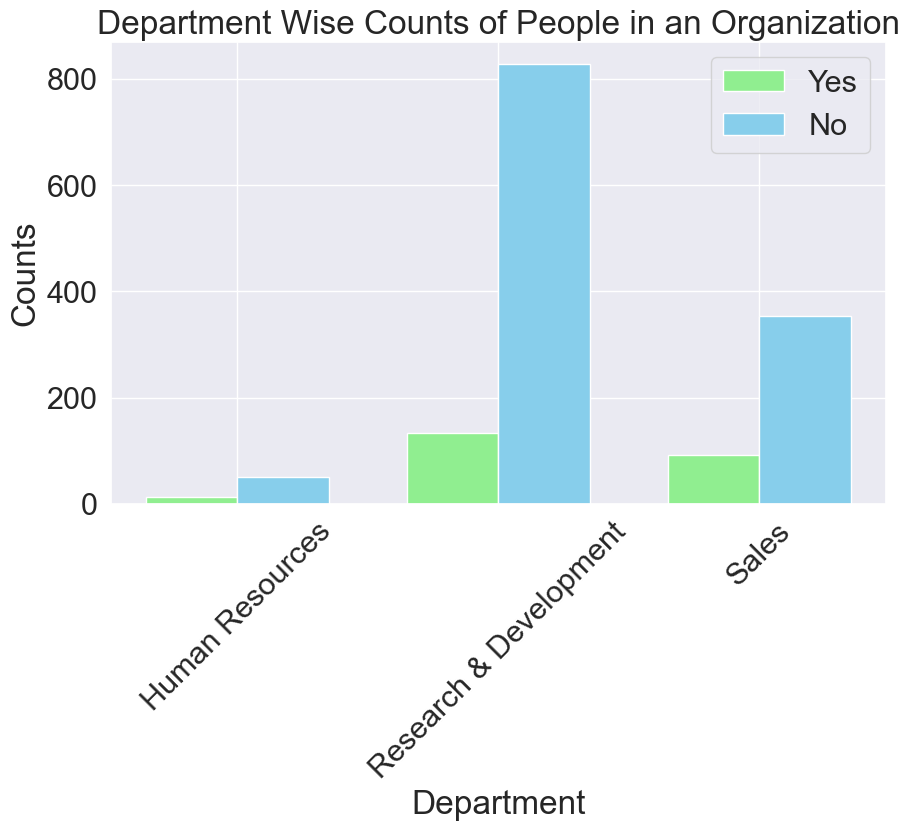

In [19]:
color_map2 = {'Yes': 'lightgreen', 'No': 'skyblue'}
dept_att = df.groupby(['Department', 'Attrition']).apply(lambda x: x['DailyRate'].count()).reset_index(name='Counts')

# Separate the data for 'Yes' and 'No' Attrition
dept_att_yes = dept_att[dept_att['Attrition'] == 'Yes']
dept_att_no = dept_att[dept_att['Attrition'] == 'No']

# Plot the data
plt.figure(figsize=(10, 6))
x = np.arange(len(dept_att_yes))
width = 0.35

plt.bar(x - width/2, dept_att_yes['Counts'], width, label='Yes', color=color_map2['Yes'])
plt.bar(x + width/2, dept_att_no['Counts'], width, label='No', color=color_map2['No'])
plt.title('Department Wise Counts of People in an Organization')
plt.xlabel('Department')
plt.ylabel('Counts')
plt.xticks(x, dept_att_yes['Department'])
plt.xticks(rotation=45)

plt.legend()
plt.show()

In the three departments, the Research & Development has the least attrition rates, compared to the Human Resources and Sales which has the highest attrition rate.

#### 4. How does Work Life Balance impact the overall attrition rates?

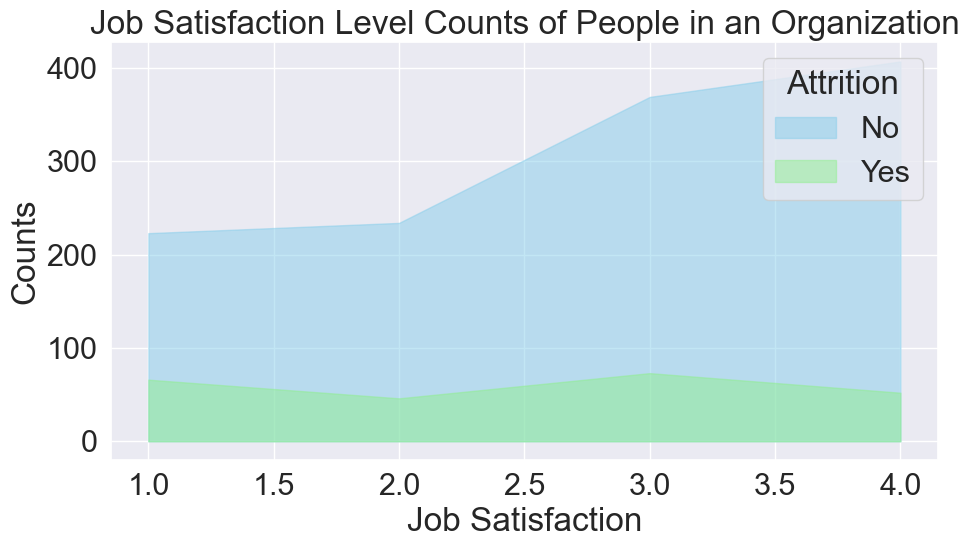

In [20]:
# Group by JobSatisfaction and Attrition, then count occurrences
jsats_att = df.groupby(['JobSatisfaction', 'Attrition'])['DailyRate'].count().reset_index(name='Counts')

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Define colors for Attrition categories
color_map2 = {'Yes': 'lightgreen', 'No': 'skyblue'}

# Plot area for each Attrition status
for attrition_status in jsats_att['Attrition'].unique():
    subset = jsats_att[jsats_att['Attrition'] == attrition_status]
    ax.fill_between(subset['JobSatisfaction'], subset['Counts'], color=color_map2[attrition_status], alpha=0.5, label=attrition_status)

# Add titles and labels
ax.set_title('Job Satisfaction Level Counts of People in an Organization')
ax.set_xlabel('Job Satisfaction')
ax.set_ylabel('Counts')
ax.legend(title='Attrition')

# Show the plot
plt.tight_layout()
plt.show()

With increase in job satisfaction, the attrition rates decrease. It however raises when the rate of job satisfaction is between 2 and 3.

#### 5. How does Job Satisfaction impact attrition?

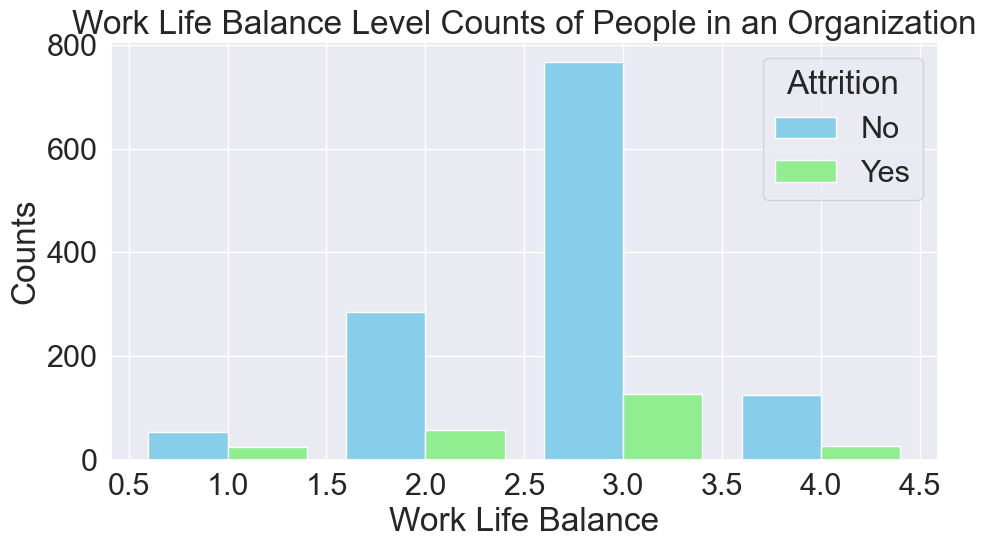

In [21]:
# Group by WorkLifeBalance and Attrition, then count occurrences
wlb_att = df.groupby(['WorkLifeBalance', 'Attrition'])['DailyRate'].count().reset_index(name='Counts')

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Define colors for Attrition categories
color_map2 = {'Yes': 'lightgreen', 'No': 'skyblue'}

# Plot bars for each Attrition category
for attrition_status in wlb_att['Attrition'].unique():
    subset = wlb_att[wlb_att['Attrition'] == attrition_status]
    ax.bar(subset['WorkLifeBalance'] + (0.2 if attrition_status == 'Yes' else -0.2),
           subset['Counts'],
           width=0.4,
           color=color_map2[attrition_status],
           label=attrition_status)

# Add titles and labels
ax.set_title('Work Life Balance Level Counts of People in an Organization')
ax.set_xlabel('Work Life Balance')
ax.set_ylabel('Counts')
ax.legend(title='Attrition')

# Show the plot
plt.tight_layout()
plt.show()

Individuals with poor work-life balance may adapt to their jobs out of necessity. However, as work-life balance improves, people become more accustomed to a higher quality of life and are more inclined to consider leaving their jobs if they are dissatisfied. This trend diminishes when work-life balance reaches an excellent level, as employees become more content and satisfied with their work.

# Data Modelling

We now try to show accurate we can predict if an employee will stay or resign using some of these variables.

First, we need to convert the categorical columns to numerical columns.

In [22]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each non-numerical column
for column in df.columns:
    if df[column].dtype == object:  # Check if the column is of type object (categorical)
        df[column] = label_encoder.fit_transform(df[column])

In [23]:
# Create new column
df['Age_Years'] = df['Age']

In [24]:
# Drop the age column
df = df.drop('Age', axis = 1)

In [25]:
df.head()

,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_Years
0,1,2,1102,2,1,2,1,2,0,94,...,1,0,8,0,1,6,4,0,5,41
1,0,1,279,1,8,1,1,3,1,61,...,4,1,10,3,3,10,7,1,7,49
2,1,2,1373,1,2,2,4,4,1,92,...,2,0,7,3,3,0,0,0,0,37
3,0,1,1392,1,3,4,1,4,0,56,...,3,0,8,3,3,8,7,3,0,33
4,0,2,591,1,2,1,3,1,1,40,...,4,1,6,3,3,2,2,2,2,27


We then split the data into two parts:
 
0 indicated: no `attrition` - employee is working at the company
1 indicates: there is `attrition` - employee resigned the company 

In [26]:
#Split the data and create an independent x data set and dependent y data set
X = df.iloc[:,1:df.shape[1]].values
y = df.iloc[:,0].values

In [27]:
#Split the data into 75% training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1234)

We will try different classification models to see which one is performing better.

#### SMOTE/SMOTENC Technique

SMOTE to fix the class imbalancement found during the decision tree classification

In [32]:
# Instantiate SMOTENC

smote = SMOTENC(categorical_features = [1,2],random_state = 123)
resampled_X_train, resampled_y_train = smote.fit_resample(X_train,y_train)

#### Logistic Regression

In [33]:
#logistic regression
logreg = LogisticRegression(random_state=42)

#fit the model
logreg.fit(resampled_X_train, resampled_y_train)
#predict on the labels
y_pred_log = logreg.predict(X_test)

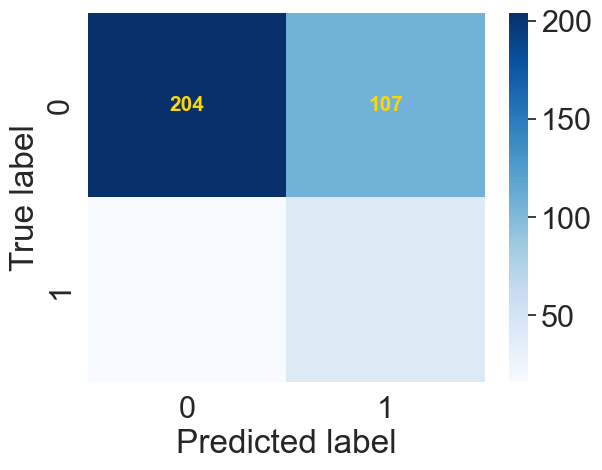

In [44]:
def plot_confusion_matrix(y_true, y_pred, classes):
    #plots confusion matrix

    cm = confusion_matrix(y_true, y_pred)
    plt.figure()
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes,
                annot_kws={'fontsize': 15, 'fontweight': 'bold', 'color': 'gold'})
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()

plot_confusion_matrix(y_test, y_pred_log, [0,1])

In [48]:
print(classification_report(y_test,y_pred_log))
print()
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.93      0.66      0.77       311
           1       0.28      0.72      0.40        57

    accuracy                           0.67       368
   macro avg       0.60      0.69      0.58       368
weighted avg       0.83      0.67      0.71       368



Confusion Matrix:
[[204 107]
 [ 16  41]]


According to this summary:
1. The recall score was 66%. This means that it was only able to identify 66% of 'No attrition' correctly and 72% of 'Attrition' instances.
2. Had an accuracy of 67%. This is not enough to use as a model.

#### Decision Tree Classification

Accuracy:0.76

Classfication Report:
              precision    recall  f1-score   support

           0       0.87      0.84      0.86       311
           1       0.28      0.33      0.30        57

    accuracy                           0.76       368
   macro avg       0.58      0.59      0.58       368
weighted avg       0.78      0.76      0.77       368


Confusion Matrix:
[[262  49]
 [ 38  19]]


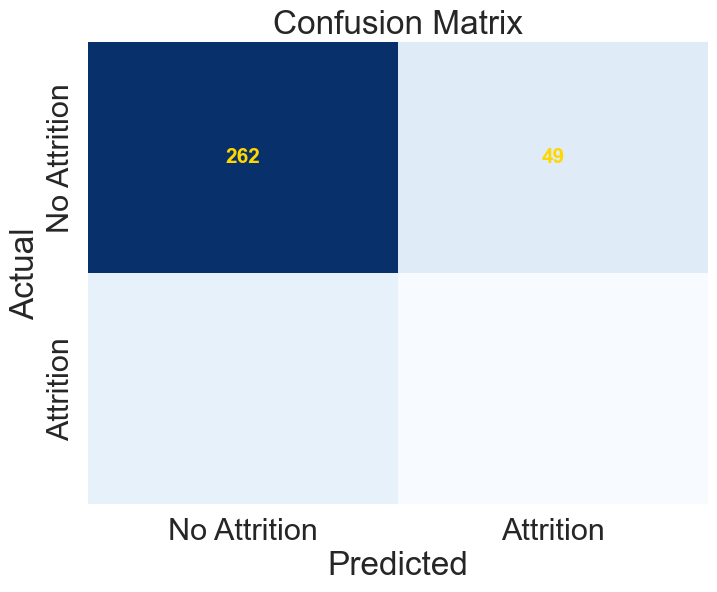

In [47]:
# Create the decision tree
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
clf.fit(resampled_X_train, resampled_y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy:{accuracy:.2f}")

# Display the classification report and confusion matrix
print('\nClassfication Report:')
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix for better visualization
conf_matrix_df = pd.DataFrame(cm, index=['No Attrition', 'Attrition'],columns=['No Attrition', 'Attrition'])

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={'fontsize': 15, 'fontweight': 'bold', 'color': 'gold'})
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

The summary shows that:
1. The accuracy shows 76% which is still not the accuracy we require for a model.

We then look for another classification that we can use.

#### Random forest classification

In [28]:
# Create a model (object) for classification
rfcm = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
# Build a random forest classification model
rfcm.fit(X_train, y_train)
# Make predictions using the test data
y_pred = rfcm.predict(X_test)

In [29]:
# import metrics library
from sklearn import metrics

# Print the performance scores.
print('\n** Performance Scores **')
# Calculate accuracy
accuracy = rfcm.score(X_test, y_test)
print('Accuracy: {0:.2f}'.format(accuracy))
# show the Classification Report
print('\n** Classification Report using Random Forest Algorithm **\n')
print(metrics.classification_report(y_test,y_pred))


** Performance Scores **
Accuracy: 0.86

** Classification Report using Random Forest Algorithm **

              precision    recall  f1-score   support

           0       0.87      0.99      0.92       311
           1       0.71      0.18      0.28        57

    accuracy                           0.86       368
   macro avg       0.79      0.58      0.60       368
weighted avg       0.84      0.86      0.82       368



This shows that the model has 86% accuracy which means that this model is performing well (good overall performance).

Since this is the best model to use, we can check what aspects are important in predicting the attrition rate amongst employees in the company.

In [30]:
# Return the feature importances (the higher, the more important the feature).
importances = pd.DataFrame({'feature':df.iloc[:, 1:df.shape[1]].columns,'importance':np.round(rfcm.feature_importances_,3)}) #Note: The target column is at position 0
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
MonthlyIncome,0.073
Age_Years,0.064
MonthlyRate,0.060
DistanceFromHome,0.055
OverTime,0.051
HourlyRate,0.048
YearsAtCompany,0.047
TotalWorkingYears,0.047
DailyRate,0.046


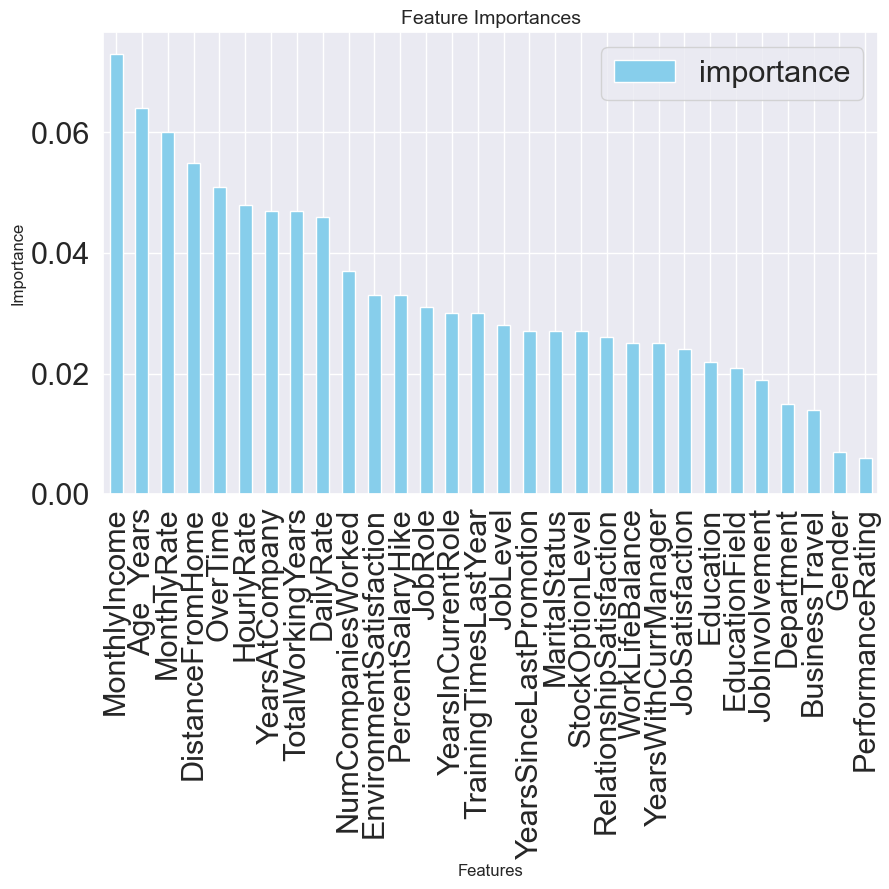

In [31]:
importances.plot(kind='bar', color='skyblue', figsize=(10,6))
plt.title('Feature Importances', fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.show()

Monthly income appears to be the most important feature followed by the person's age, monthly rate, and distance from home. Seeing this result makes me want to see if people with a higher income are less likely to leave than someone with a lower income.

### Conclusion

Based on our analysis of the Richard's & Sons HR Analytics Employee Attrition & Performance dataset, we can draw the following conclusions:

1. The developed model achieved an accuracy of 86%, indicating that it has good predictive power.

2. Factors such as job level, monthly income, and age were found to be important predictors of employee attrition.

3. The company can use the model to identify employees who are at high risk of leaving and take proactive measures to retain them.

4. Possible strategies for improving employee retention include offering competitive compensation and benefits packages, providing opportunities for career growth and development, and fostering a positive work environment.

Overall, our analysis highlights the importance of leveraging HR analytics to gain insights into workforce trends and patterns, and ultimately to make strategic decisions that can improve employee retention and reduce the costs associated with employee turnover.